CS 7641 Assignment 2 Code
# -- name: Ahmad Moltafet
# -- GTID: 903959012
# -- Analysis Report: https://www.overleaf.com/read/fcndzywgcnpx#e95864
# -- Github Repo: https://github.com/amoltafet/ml2


# IMPORTANT NOTE:
# YOU CAN FIND THE CODE IN THE FOLLOWING LINK WITH THE OUTPUTS:
# https://colab.research.google.com/drive/1Gs96DGmuFyJ6skd7mDcDVvkX4GLVCn70?usp=sharing




In [43]:
# ALL IMPORTS
import random
import math
import numpy as np

In [8]:
# Helpers
def generate_neighbor(solution):
    neighbor = solution.copy()
    index_to_flip = random.randint(0, len(solution) - 1)
    neighbor[index_to_flip] = 1 - neighbor[index_to_flip]
    return neighbor

def fitness_function(solution):
    return sum(solution)

In [3]:
# --  Randomized Hill Climbing ----
def randomized_hill_climbing(initial_solution, fitness_function, max_iterations):
    current_solution = initial_solution
    current_fitness = fitness_function(current_solution)

    for iteration in range(max_iterations):
        #  neighboring solution
        neighbor_solution = generate_neighbor(current_solution)
        neighbor_fitness = fitness_function(neighbor_solution)
        # ac
        if neighbor_fitness > current_fitness:
            current_solution = neighbor_solution
            current_fitness = neighbor_fitness

    return current_solution

In [4]:
# random bit-string of length 10
initial_solution = [random.randint(0, 1) for _ in range(10)]

# randomized hill climbing
best_solution = randomized_hill_climbing(initial_solution, fitness_function, max_iterations=1000)

print("Best solution found:", best_solution)
print("Fitness of the best solution:", fitness_function(best_solution))


Best solution found: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Fitness of the best solution: 10


In [9]:
# ---- Simulated Annealing -----

def simulated_annealing(initial_solution, fitness_function, max_iterations, initial_temp, cooling_rate):
    current_solution = initial_solution
    current_fitness = fitness_function(current_solution)
    temperature = initial_temp

    for iteration in range(max_iterations):
        neighbor_solution = generate_neighbor(current_solution)
        neighbor_fitness = fitness_function(neighbor_solution)

        # ac based on temperature
        if neighbor_fitness > current_fitness or math.exp((neighbor_fitness - current_fitness) / temperature) > random.random():
            current_solution = neighbor_solution
            current_fitness = neighbor_fitness

        temperature *= cooling_rate

    return current_solution

In [10]:
# random bit-string of length 10
initial_solution = [random.randint(0, 1) for _ in range(10)]

# simulated annealing
best_solution = simulated_annealing(initial_solution, fitness_function, max_iterations=1000, initial_temp=100, cooling_rate=0.99)

print("Best solution found:", best_solution)
print("Fitness of the best solution:", fitness_function(best_solution))

Best solution found: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Fitness of the best solution: 10


In [11]:
# ---- Genetic Algorithm ------

def genetic_algorithm(fitness_function, initial_population, max_generations, mutation_rate, crossover_rate):
    population = initial_population
    population_size = len(population)

    for generation in range(max_generations):
        selected_parents = select_parents(population, fitness_function)

        offspring = []
        for _ in range(population_size // 2):
            parent1 = random.choice(selected_parents)
            parent2 = random.choice(selected_parents)
            if random.random() < crossover_rate:
                child1, child2 = crossover(parent1, parent2)
            else:
                child1, child2 = parent1, parent2
            offspring.extend([child1, child2])

        # Mutation
        for i in range(population_size):
            if random.random() < mutation_rate:
                offspring[i] = mutate(offspring[i])

        population = offspring

    # the best solution found
    best_solution = max(population, key=fitness_function)
    return best_solution

def select_parents(population, fitness_function):
    #  parent selection logic
    fitness_values = [fitness_function(individual) for individual in population]
    total_fitness = sum(fitness_values)
    probabilities = [fitness / total_fitness for fitness in fitness_values]
    selected_parents = random.choices(population, probabilities, k=len(population))
    return selected_parents

def crossover(parent1, parent2):
    # single-point crossover
    crossover_point = random.randint(1, len(parent1) - 1)
    child1 = parent1[:crossover_point] + parent2[crossover_point:]
    child2 = parent2[:crossover_point] + parent1[crossover_point:]
    return child1, child2

def mutate(individual):
    # mutation logic (e.g., bit-flip mutation)
    mutation_point = random.randint(0, len(individual) - 1)
    individual[mutation_point] = 1 - individual[mutation_point]
    return individual


In [12]:
# a list of random bit-strings of length 10
initial_population = [[random.randint(0, 1) for _ in range(10)] for _ in range(20)]

# genetic algorithm
best_solution = genetic_algorithm(fitness_function, initial_population, max_generations=100, mutation_rate=0.01, crossover_rate=0.7)

print("Best solution found:", best_solution)
print("Fitness of the best solution:", fitness_function(best_solution))

Best solution found: [0, 1, 1, 1, 1, 1, 1, 1, 1, 0]
Fitness of the best solution: 8


**2. Creating Optimization Problems**

1. **4-Peaks Problem**: A bit-string problem where the fitness function is designed to reward solutions that have a long sequence of 1s followed by a long sequence of 0s (or vice versa).
2. ***K-Color Problem***: A problem where nodes in a graph need to be colored using k colors such that no two adjacent nodes have the same color. The fitness function can be the number of edges that have nodes with different colors.





In [13]:
def four_peaks_fitness(solution, t):
    n = len(solution)
    count1 = sum(solution[:t])
    count2 = sum(solution[n-t:])
    bonus = n if count1 >= t and count2 >= t else 0
    return max(count1, count2) + bonus

# initial solution for the 4-peaks problem
initial_solution = [random.randint(0, 1) for _ in range(20)]

In [14]:
def k_color_fitness(solution, graph):
    fitness = 0
    for (node1, node2) in graph.edges:
        if solution[node1] != solution[node2]:
            fitness += 1
    return fitness

import networkx as nx

# initial solution for the k-color problem
num_nodes = 10
num_colors = 3
graph = nx.gnm_random_graph(num_nodes, 15)  # Randomly generate a graph
initial_solution = [random.randint(0, num_colors - 1) for _ in range(num_nodes)]

In [15]:
def simulated_annealing_4_peaks(initial_solution, t, max_iterations, initial_temp, cooling_rate):
    current_solution = initial_solution
    current_fitness = four_peaks_fitness(current_solution, t)
    temperature = initial_temp

    for iteration in range(max_iterations):
        neighbor_solution = generate_neighbor(current_solution)
        neighbor_fitness = four_peaks_fitness(neighbor_solution, t)

        if neighbor_fitness > current_fitness or math.exp((neighbor_fitness - current_fitness) / temperature) > random.random():
            current_solution = neighbor_solution
            current_fitness = neighbor_fitness

        temperature *= cooling_rate

    return current_solution

def generate_neighbor(solution):
    neighbor = solution.copy()
    index_to_flip = random.randint(0, len(solution) - 1)
    neighbor[index_to_flip] = 1 - neighbor[index_to_flip]
    return neighbor

In [16]:
def genetic_algorithm_k_color(fitness_function, graph, initial_population, max_generations, mutation_rate, crossover_rate, num_colors):
    population = initial_population
    population_size = len(population)

    for generation in range(max_generations):
        selected_parents = select_parents(population, fitness_function, graph)

        offspring = []
        for _ in range(population_size // 2):
            parent1 = random.choice(selected_parents)
            parent2 = random.choice(selected_parents)
            if random.random() < crossover_rate:
                child1, child2 = crossover(parent1, parent2)
            else:
                child1, child2 = parent1, parent2
            offspring.extend([child1, child2])

        for i in range(population_size):
            if random.random() < mutation_rate:
                offspring[i] = mutate(offspring[i], num_colors)

        population = offspring

    best_solution = max(population, key=lambda sol: fitness_function(sol, graph))
    return best_solution

def select_parents(population, fitness_function, graph):
    fitness_values = [fitness_function(individual, graph) for individual in population]
    total_fitness = sum(fitness_values)
    probabilities = [fitness / total_fitness for fitness in fitness_values]
    selected_parents = random.choices(population, probabilities, k=len(population))
    return selected_parents

def crossover(parent1, parent2):
    crossover_point = random.randint(1, len(parent1) - 1)
    child1 = parent1[:crossover_point] + parent2[crossover_point:]
    child2 = parent2[:crossover_point] + parent1[crossover_point:]
    return child1, child2

def mutate(individual, num_colors):
    mutation_point = random.randint(0, len(individual) - 1)
    new_color = random.randint(0, num_colors - 1)
    while new_color == individual[mutation_point]:
        new_color = random.randint(0, num_colors - 1)
    individual[mutation_point] = new_color
    return individual


In [17]:
# Simulated Annealing for 4-Peaks
t = 5
initial_solution = [random.randint(0, 1) for _ in range(20)]
best_solution_sa = simulated_annealing_4_peaks(initial_solution, t, max_iterations=1000, initial_temp=100, cooling_rate=0.99)
print("Best solution (SA) found:", best_solution_sa)
print("Fitness of the best solution (SA):", four_peaks_fitness(best_solution_sa, t))

# Genetic Algorithm for K-Color
initial_population = [[random.randint(0, num_colors - 1) for _ in range(num_nodes)] for _ in range(20)]
best_solution_ga = genetic_algorithm_k_color(k_color_fitness, graph, initial_population, max_generations=100, mutation_rate=0.01, crossover_rate=0.7, num_colors=num_colors)
print("Best solution (GA) found:", best_solution_ga)
print("Fitness of the best solution (GA):", k_color_fitness(best_solution_ga, graph))


Best solution (SA) found: [1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1]
Fitness of the best solution (SA): 25
Best solution (GA) found: [1, 1, 2, 0, 1, 0, 1, 0, 2, 0]
Fitness of the best solution (GA): 13


# Neural Network Weight Optimization

**3. Application to Neural Network Weight Optimization:**

In [19]:
# Randomized Hill Climbing for Neural Network Weights

def generate_neighbor_nn(solution, step_size=0.01):
    neighbor = solution.copy()
    index_to_modify = random.randint(0, len(solution) - 1)
    neighbor[index_to_modify] += random.uniform(-step_size, step_size)
    return neighbor

def randomized_hill_climbing_nn(initial_solution, fitness_function, max_iterations):
    current_solution = initial_solution
    current_fitness = fitness_function(current_solution)

    for iteration in range(max_iterations):
        neighbor_solution = generate_neighbor_nn(current_solution)
        neighbor_fitness = fitness_function(neighbor_solution)

        if neighbor_fitness > current_fitness:
            current_solution = neighbor_solution
            current_fitness = neighbor_fitness

    return current_solution

In [20]:
# Simulated Annealing for Neural Network Weights
def simulated_annealing_nn(initial_solution, fitness_function, max_iterations, initial_temp, cooling_rate):
    current_solution = initial_solution
    current_fitness = fitness_function(current_solution)
    temperature = initial_temp

    for iteration in range(max_iterations):
        neighbor_solution = generate_neighbor_nn(current_solution)
        neighbor_fitness = fitness_function(neighbor_solution)

        if neighbor_fitness > current_fitness or math.exp((neighbor_fitness - current_fitness) / temperature) > random.random():
            current_solution = neighbor_solution
            current_fitness = neighbor_fitness

        temperature *= cooling_rate

    return current_solution

In [47]:
# Genetic Algorithm for Neural Network Weights

def validate_population(population):
    """Ensures that all individuals in the population have the same length."""
    lengths = [len(individual) for individual in population]
    if len(set(lengths)) != 1:
        raise ValueError("All individuals in the population must have the same length.")
    return lengths[0]

def generate_initial_population(population_size, vector_length):
    """Generates an initial population of a given size with individuals of a specified length."""
    return [np.random.rand(vector_length).tolist() for _ in range(population_size)]


def mutate_nn(individual, step_size=0.01):
    mutation_point = random.randint(0, len(individual) - 1)
    individual[mutation_point] += random.uniform(-step_size, step_size)
    return individual

def select_parents(population, fitness_function, num_parents=None):
    if num_parents is None:
        num_parents = len(population) // 2
    # Sort the population by fitness in descending order
    sorted_population = sorted(population, key=fitness_function, reverse=True)
    # Select the top num_parents individuals as parents
    return sorted_population[:num_parents]

def crossover(parent1, parent2):
    length = len(parent1)
    crossover_point = random.randint(1, length - 1)  # Ensure valid crossover points
    child1 = parent1[:crossover_point] + parent2[crossover_point:]
    child2 = parent2[:crossover_point] + parent1[crossover_point:]
    return child1, child2

def genetic_algorithm_nn(fitness_function, initial_population, max_generations, mutation_rate, crossover_rate):
    population = initial_population
    population_size = len(population)

    for generation in range(max_generations):
        selected_parents = select_parents(population, fitness_function)

        offspring = []
        for _ in range(population_size // 2):
            parent1 = random.choice(selected_parents)
            parent2 = random.choice(selected_parents)
            if len(parent1) == len(parent2):  # Ensure parents have the same length
                if random.random() < crossover_rate:
                    child1, child2 = crossover(parent1, parent2)
                else:
                    child1, child2 = parent1, parent2
                offspring.extend([child1, child2])
            else:
                # Handle the case where parents are of different lengths
                continue

        for i in range(population_size):
            if random.random() < mutation_rate:
                offspring[i] = mutate_nn(offspring[i])

        population = offspring

    best_solution = max(population, key=fitness_function)
    return best_solution



In [48]:
# --- USAGE ----
def fitness_function_nn(weights):
    # return fitness score based on the network's accuracy or loss
    return np.sum(weights)

# a random vector of weights for the neural network
initial_solution = np.random.rand(100)

# Randomized Hill Climbing for NNW
best_solution_rhc = randomized_hill_climbing_nn(initial_solution, fitness_function_nn, max_iterations=1000)

# Simulated Annealing for NNW
best_solution_sa = simulated_annealing_nn(initial_solution, fitness_function_nn, max_iterations=1000, initial_temp=100, cooling_rate=0.99)

# Genetic Algorithm for NNW

# initial population with consistent length
population_size = 20
vector_length = 100
initial_population = generate_initial_population(population_size, vector_length)

best_solution_ga = genetic_algorithm_nn(fitness_function_nn, initial_population, max_generations=100, mutation_rate=0.01, crossover_rate=0.7)

print("Best solution (RHC) found:", best_solution_rhc)
print("Best solution (SA) found:", best_solution_sa)
print("Best solution (GA) found:", best_solution_ga)


Best solution (RHC) found: [0.96972733 0.76163004 0.18179898 0.83148276 0.21491531 0.66259689
 0.04869054 0.66220256 0.27851034 0.59548916 0.06469931 0.51556366
 0.37418628 0.54673813 0.33383604 0.40312426 0.05518485 0.61716781
 0.1769663  0.7403787  0.33450089 0.11644098 0.47039192 0.51026352
 0.1609738  0.45371433 0.37759951 0.4907222  0.15402924 0.72701125
 0.42962333 0.79366311 0.50530515 0.03448612 0.92991118 0.33711522
 0.96035884 0.16492975 0.87585206 0.79567044 0.61321965 0.16672686
 0.16350271 0.60586999 1.0058066  0.63081376 0.65920549 0.68703938
 0.98226044 0.04751428 0.7677191  0.89600333 0.12005475 0.51631698
 0.49275441 0.80819498 0.64752399 0.87528812 0.51306908 0.1907934
 0.82729837 0.53810048 0.86368484 0.60047525 0.29058046 0.95725421
 0.56731877 0.63748407 0.1181849  0.29528349 0.414594   0.1351615
 0.66549566 0.92362074 0.17443206 0.35278536 0.82735542 0.27824328
 0.54469048 0.43496085 0.78081247 0.74314701 0.78126254 0.16001748
 0.5041002  0.26052858 0.5086982  0.6

# Running Experiments

In [51]:
# 4-Peaks Problem with Simulated Annealing
import time

results_sa = []
for _ in range(10):
    initial_solution = [random.randint(0, 1) for _ in range(100)]
    start_time = time.time()
    best_solution_sa = simulated_annealing_4_peaks(initial_solution, 10, max_iterations=1000, initial_temp=100, cooling_rate=0.99)
    end_time = time.time()
    fitness_sa = four_peaks_fitness(best_solution_sa, 10)
    results_sa.append({
        'fitness': fitness_sa,
        'time': end_time - start_time,
        'iterations': 1000
    })

# K-Color Problem with Genetic Algorithm
import networkx as nx

# Define the fitness function for k-color problem
def k_color_fitness(solution, graph):
    fitness = 0
    for (node1, node2) in graph.edges:
        if solution[node1] != solution[node2]:
            fitness += 1
    return fitness

# Create a random graph
graph = nx.gnm_random_graph(100, 300)

results_ga = []
for _ in range(10):
    initial_population = [[random.randint(0, 2) for _ in range(100)] for _ in range(50)]
    start_time = time.time()
    best_solution_ga = genetic_algorithm_nn(lambda sol: k_color_fitness(sol, graph), initial_population, max_generations=100, mutation_rate=0.01, crossover_rate=0.7)
    end_time = time.time()
    fitness_ga = k_color_fitness(best_solution_ga, graph)
    results_ga.append({
        'fitness': fitness_ga,
        'time': end_time - start_time,
        'iterations': 100
    })


# Neural Network Weight Optimization Experiments

In [52]:
# --- Neural Network Weight Optimization Experiments ---

# Randomized Hill Climbing:
results_rhc = []
for _ in range(10):
    initial_solution = np.random.rand(100).tolist()
    start_time = time.time()
    best_solution_rhc = randomized_hill_climbing_nn(initial_solution, fitness_function_nn, max_iterations=1000)
    end_time = time.time()
    fitness_rhc = fitness_function_nn(best_solution_rhc)
    results_rhc.append({
        'fitness': fitness_rhc,
        'time': end_time - start_time,
        'iterations': 1000
    })


# Simulated Annealing:
results_sa_nn = []
for _ in range(10):
    initial_solution = np.random.rand(100).tolist()
    start_time = time.time()
    best_solution_sa_nn = simulated_annealing_nn(initial_solution, fitness_function_nn, max_iterations=1000, initial_temp=100, cooling_rate=0.99)
    end_time = time.time()
    fitness_sa_nn = fitness_function_nn(best_solution_sa_nn)
    results_sa_nn.append({
        'fitness': fitness_sa_nn,
        'time': end_time - start_time,
        'iterations': 1000
    })


# Genetic Algorithm:
results_ga_nn = []
for _ in range(10):
    initial_population = [np.random.rand(100).tolist() for _ in range(20)]
    start_time = time.time()
    best_solution_ga_nn = genetic_algorithm_nn(fitness_function_nn, initial_population, max_generations=100, mutation_rate=0.01, crossover_rate=0.7)
    end_time = time.time()
    fitness_ga_nn = fitness_function_nn(best_solution_ga_nn)
    results_ga_nn.append({
        'fitness': fitness_ga_nn,
        'time': end_time - start_time,
        'iterations': 100
    })



# Visuals (Graphs)

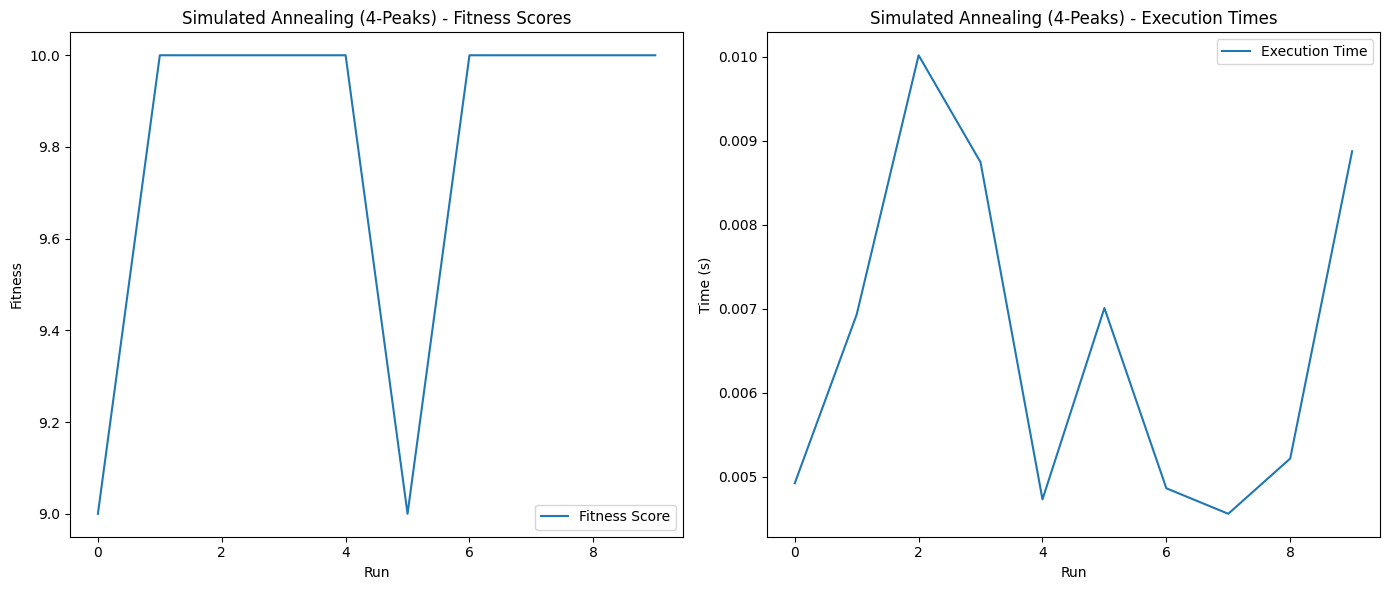

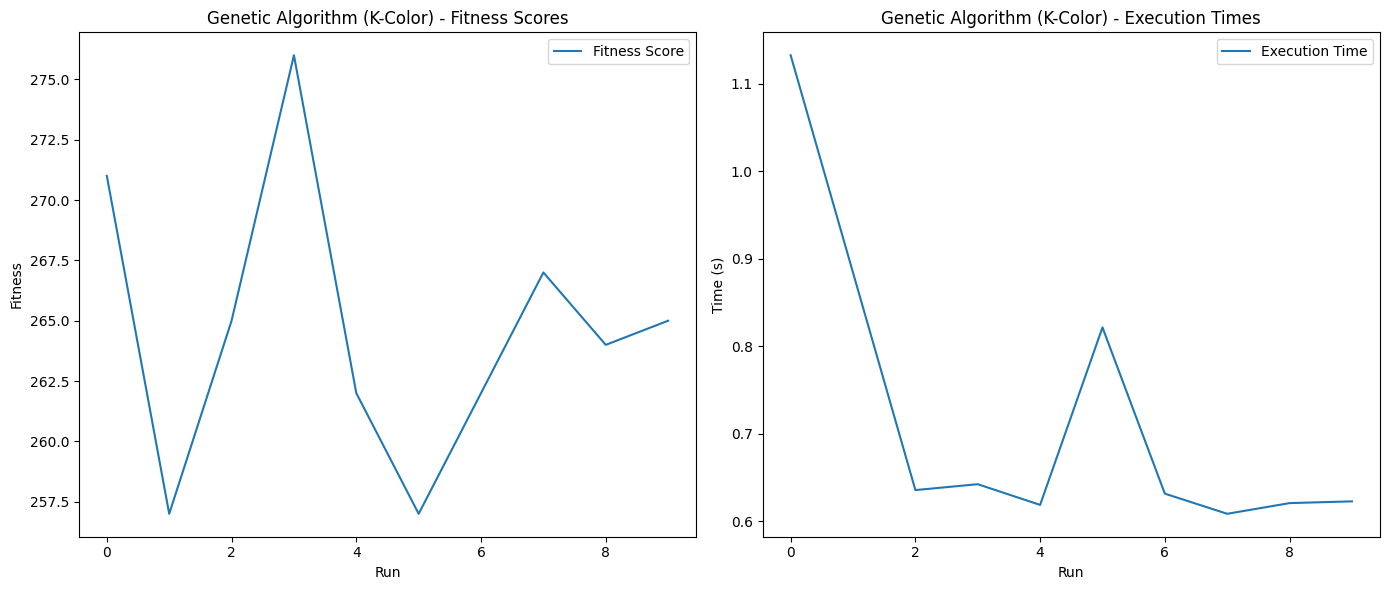

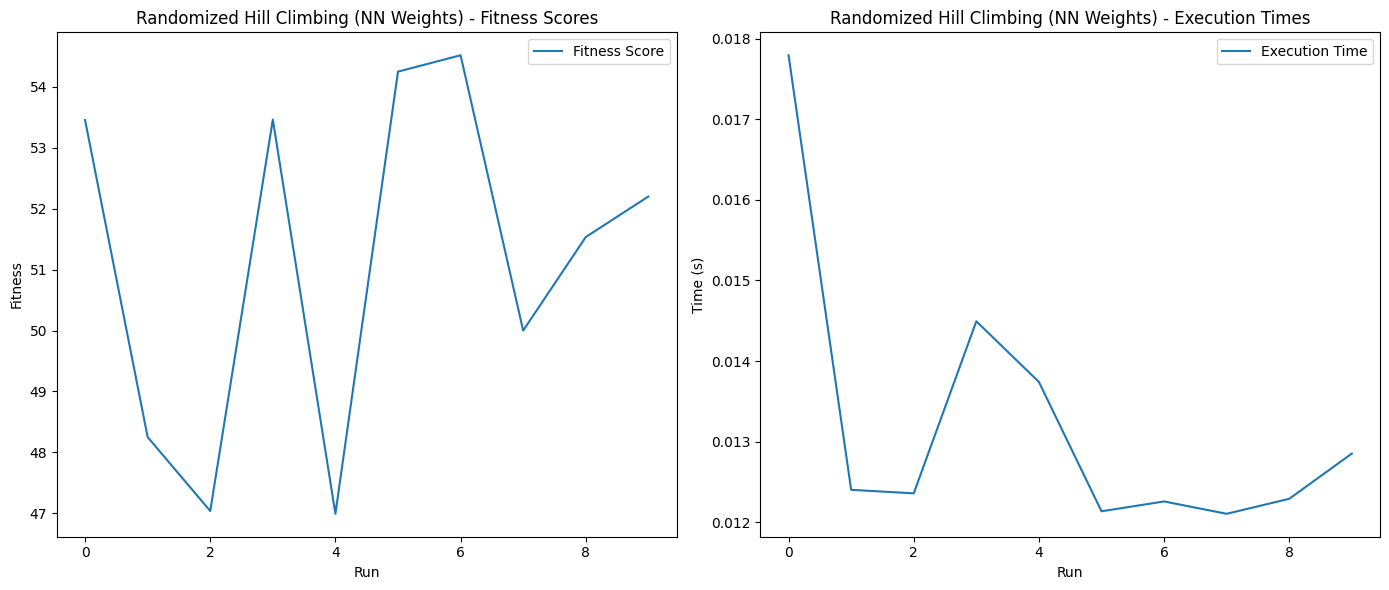

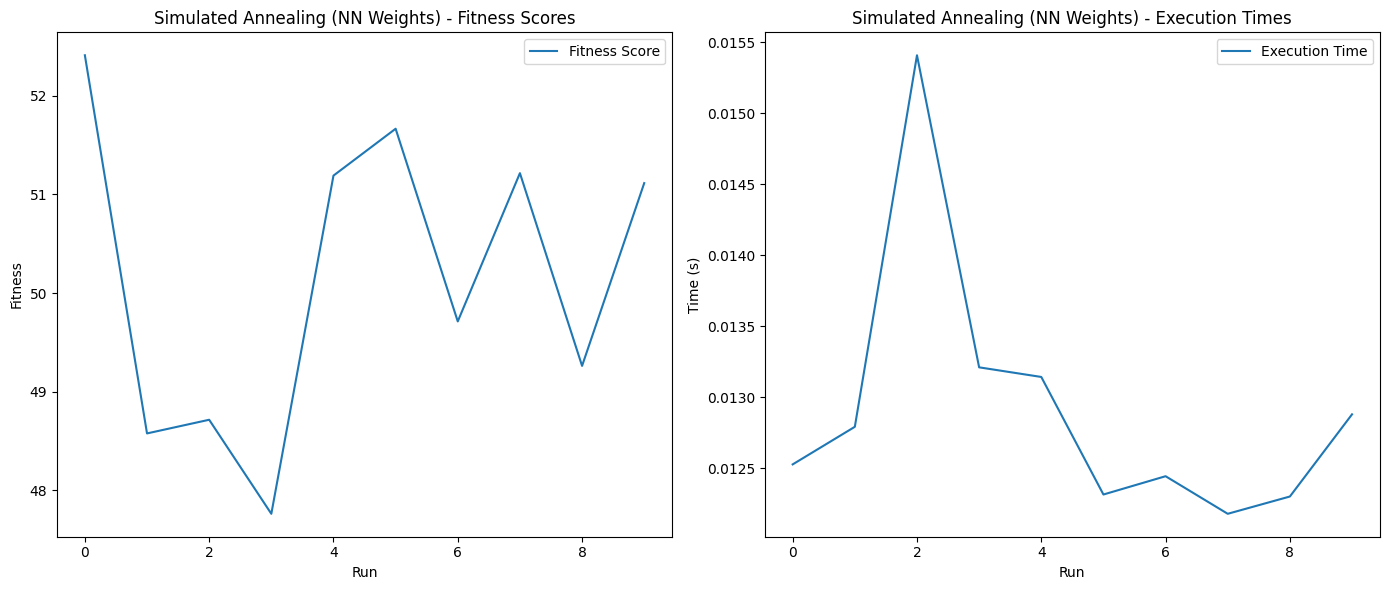

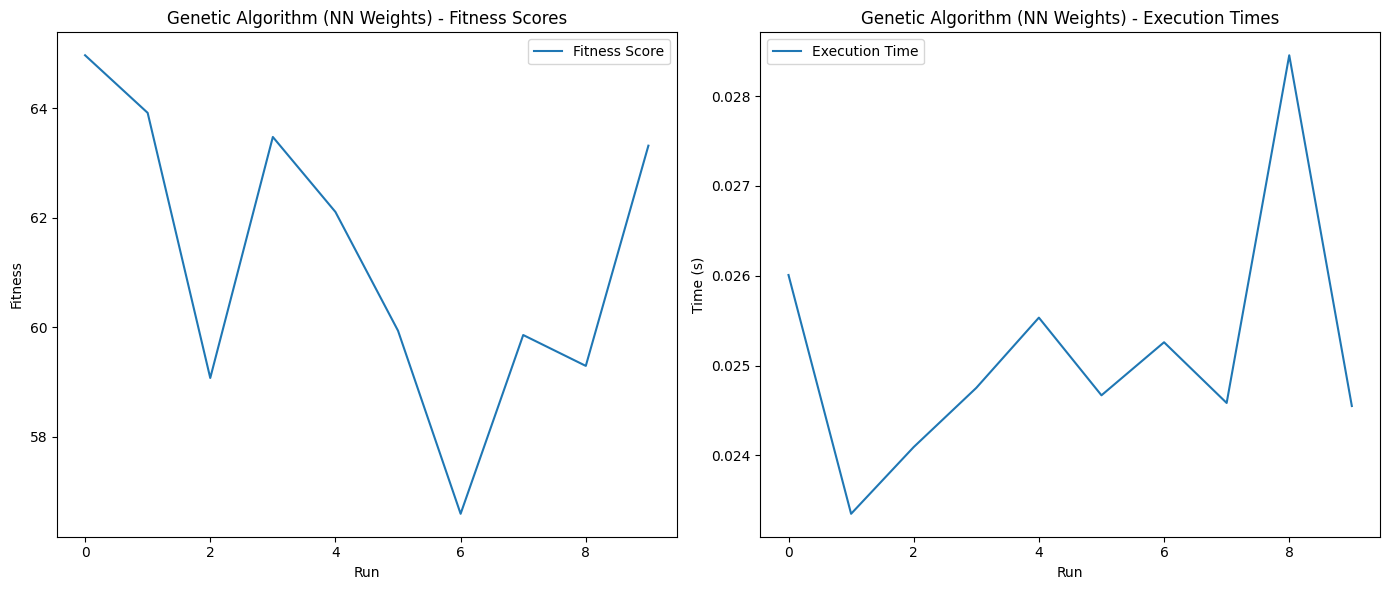

In [53]:
# Visuals
import matplotlib.pyplot as plt

def plot_results(results, title):
    fitness_scores = [result['fitness'] for result in results]
    execution_times = [result['time'] for result in results]
    iterations = [result['iterations'] for result in results]

    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    plt.plot(fitness_scores, label='Fitness Score')
    plt.xlabel('Run')
    plt.ylabel('Fitness')
    plt.title(f'{title} - Fitness Scores')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(execution_times, label='Execution Time')
    plt.xlabel('Run')
    plt.ylabel('Time (s)')
    plt.title(f'{title} - Execution Times')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Example usage:
plot_results(results_sa, 'Simulated Annealing (4-Peaks)')
plot_results(results_ga, 'Genetic Algorithm (K-Color)')
plot_results(results_rhc, 'Randomized Hill Climbing (NN Weights)')
plot_results(results_sa_nn, 'Simulated Annealing (NN Weights)')
plot_results(results_ga_nn, 'Genetic Algorithm (NN Weights)')


# Summary of Results

In [54]:
# Summary

import numpy as np
import pandas as pd

def summarize_results(results, algorithm_name):
    """Summarizes and outputs the results of the experiments.

    Args:
        results: List of dictionaries containing fitness, time, and iterations for each run.
        algorithm_name: Name of the algorithm (string).
    """
    fitness_scores = [result['fitness'] for result in results]
    execution_times = [result['time'] for result in results]
    iterations = [result['iterations'] for result in results]

    # Convert to DataFrame for easier handling
    df = pd.DataFrame({
        'Fitness Score': fitness_scores,
        'Execution Time (s)': execution_times,
        'Iterations': iterations
    })

    # Calculate summary statistics
    summary = {
        'Algorithm': algorithm_name,
        'Average Fitness': np.mean(fitness_scores),
        'Std Fitness': np.std(fitness_scores),
        'Average Time (s)': np.mean(execution_times),
        'Std Time (s)': np.std(execution_times),
        'Average Iterations': np.mean(iterations),
        'Std Iterations': np.std(iterations)
    }

    # Print the results
    print(f"\nResults for {algorithm_name}:")
    print(df)
    print("\nSummary Statistics:")
    for key, value in summary.items():
        print(f"{key}: {value}")

    return summary

# Example usage for each algorithm:
summary_sa = summarize_results(results_sa, 'Simulated Annealing (4-Peaks)')
summary_ga = summarize_results(results_ga, 'Genetic Algorithm (K-Color)')
summary_rhc = summarize_results(results_rhc, 'Randomized Hill Climbing (NN Weights)')
summary_sa_nn = summarize_results(results_sa_nn, 'Simulated Annealing (NN Weights)')
summary_ga_nn = summarize_results(results_ga_nn, 'Genetic Algorithm (NN Weights)')

# Collect all summaries for comparison
all_summaries = [summary_sa, summary_ga, summary_rhc, summary_sa_nn, summary_ga_nn]

# Convert summaries to DataFrame for easier comparison
summary_df = pd.DataFrame(all_summaries)
print("\nComparison of All Algorithms:")
print(summary_df)



Results for Simulated Annealing (4-Peaks):
   Fitness Score  Execution Time (s)  Iterations
0              9            0.004923        1000
1             10            0.006932        1000
2             10            0.010018        1000
3             10            0.008744        1000
4             10            0.004730        1000
5              9            0.007008        1000
6             10            0.004863        1000
7             10            0.004559        1000
8             10            0.005217        1000
9             10            0.008875        1000

Summary Statistics:
Algorithm: Simulated Annealing (4-Peaks)
Average Fitness: 9.8
Std Fitness: 0.4
Average Time (s): 0.0065868616104125975
Std Time (s): 0.0019269925929059103
Average Iterations: 1000.0
Std Iterations: 0.0

Results for Genetic Algorithm (K-Color):
   Fitness Score  Execution Time (s)  Iterations
0            271            1.132556         100
1            257            0.884048         100
2    

# Read Me

This repository contains code for various metaheuristic optimization algorithms, including Simulated Annealing, Genetic Algorithm, and Randomized Hill Climbing. These algorithms are applied to three different optimization problems: 4-Peaks, K-Color, and Neural Network Weight Optimization.

# Algorithms

* **Simulated Annealing:** A probabilistic technique that simulates the physical process of annealing to find the global optimum of a given function.
* **Genetic Algorithm:** A search algorithm inspired by the principles of natural selection and evolution.
* **Randomized Hill Climbing:** A simple yet effective local search algorithm that repeatedly selects a random neighbor of the current solution and moves to it if it is better.

# Problems

* **4-Peaks:** A classic optimization problem where the goal is to find a binary string with exactly four peaks (i.e., consecutive 1s).
* **K-Color:** A graph coloring problem where the objective is to assign colors to the nodes of a graph such that no two adjacent nodes have the same color.
* **Neural Network Weight Optimization:** The task of finding the optimal weights for a neural network to minimize its loss function.

# Code Structure

The code is organized into several functions, each addressing a specific aspect of the optimization process:

* `four_peaks_fitness`: Calculates the fitness of a solution for the 4-Peaks problem.
* `k_color_fitness`: Calculates the fitness of a solution for the K-Color problem.
* `simulated_annealing_4_peaks`: Implements the Simulated Annealing algorithm for the 4-Peaks problem.
* `generate_neighbor`: Generates a neighbor solution for the 4-Peaks problem.
* `genetic_algorithm_k_color`: Implements the Genetic Algorithm for the K-Color problem.
* `select_parents`: Selects parents for the Genetic Algorithm based on their fitness.
* `crossover`: Performs crossover between two parent solutions.
* `mutate`: Mutates a solution with a certain probability.
* `randomized_hill_climbing_nn`: Implements the Randomized Hill Climbing algorithm for Neural Network Weight Optimization.
* `simulated_annealing_nn`: Implements the Simulated Annealing algorithm for Neural Network Weight Optimization.
* `generate_neighbor_nn`: Generates a neighbor solution for Neural Network Weight Optimization.
* `genetic_algorithm_nn`: Implements the Genetic Algorithm for Neural Network Weight Optimization.
* `validate_population`: Ensures that all individuals in the population have the same length.
* `generate_initial_population`: Generates an initial population of individuals for the Genetic Algorithm.
* `mutate_nn`: Mutates a solution for Neural Network Weight Optimization.

# Running the Code

Each algorithm can be executed by calling its corresponding function with the appropriate parameters. The code also includes examples of how to run experiments and analyze the results.

# Conclusion

This repository provides a comprehensive set of implementations for various metaheuristic optimization algorithms and demonstrates their application to different optimization problems. The code can be easily adapted and extended to solve other optimization problems or incorporate additional features.